In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/weather-check/weather-check.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [4]:
if isinstance(df.columns[0], basestring):
    print "Yay"

Yay


In [5]:
df.columns = [u'RespondentID', 
              u'CheckWeather',
              u'How',
              u'App',
              u'SmartWatchLikely',
              u'Age', 
              u'Gender',
              u'HouseholdIncome',
              u'US Region']

In [6]:
df.head()

,RespondentID,CheckWeather,How,App,SmartWatchLikely,Age,Gender,HouseholdIncome,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


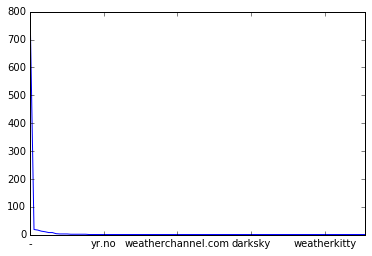

In [7]:
df.App.str.replace('app', '').str.strip().str.lower().str.replace(' ', '').value_counts().plot()

In [8]:
df.App.str.lower().str.contains('iphone')

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
898    False
899    False
900    False
901    False
902    False
903    False
904    False
905    False
906    False
907    False
908    False
909    False
910    False
911    False
912    False
913    False
914    False
915    False
916    False
917    False
918     True
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
Name: App, dtype: bool

In [9]:
df[df.App.str.lower().str.contains('iphone')].shape

(17, 9)

In [10]:
df.head()

,RespondentID,CheckWeather,How,App,SmartWatchLikely,Age,Gender,HouseholdIncome,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [11]:
df.SmartWatchLikely.unique()

array(['Very likely', 'Somewhat likely', 'Very unlikely', '-',
       'Somewhat unlikely'], dtype=object)

In [12]:
scores = {'Very unlikely':1, 'Somewhat unlikely':2, '-':3, 'Somewhat likely':4, 'Very likely':5}

def likert_scale(value):
    return scores.get(value, 3)

In [13]:
df.SmartWatchLikely.apply(likert_scale)

0      5
1      5
2      5
3      4
4      5
5      4
6      1
7      3
8      5
9      5
10     2
11     4
12     3
13     5
14     1
15     4
16     5
17     5
18     1
19     5
20     2
21     5
22     1
23     5
24     3
25     1
26     5
27     4
28     5
29     1
      ..
898    2
899    5
900    1
901    5
902    1
903    5
904    4
905    5
906    5
907    1
908    4
909    5
910    4
911    5
912    1
913    4
914    1
915    1
916    5
917    2
918    5
919    5
920    4
921    1
922    1
923    5
924    5
925    4
926    3
927    3
Name: SmartWatchLikely, dtype: int64

In [14]:
df_likert = df[["SmartWatchLikely"]].applymap(likert_scale)
df_likert.columns = ['SML']

In [15]:
pd.concat([df, df_likert], axis=1)

,RespondentID,CheckWeather,How,App,SmartWatchLikely,Age,Gender,HouseholdIncome,US Region,SML
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic,5
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-,5
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic,5
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-,4
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic,5
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central,4
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central,1
7,3886913587,Yes,-,-,-,-,-,-,-,3
8,3886889048,Yes,The Weather Channel,-,Very likely,30 - 44,Male,Prefer not to answer,Pacific,5
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central,5


In [16]:
min_max_age = df.Age.str.split(' - ', expand=True)
min_max_age.columns = ['min_age', 'max_age']
min_max_age.min_age = pd.to_numeric(min_max_age.min_age, errors='coerce')
min_max_age.max_age = pd.to_numeric(min_max_age.max_age, errors='coerce')
min_max_age.describe()

/Users/pizzato/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,min_age,max_age
count,658.000000,658.000000
mean,33.127660,46.325228
std,11.134796,12.250083
min,18.000000,29.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,45.000000,59.000000


In [17]:
print min_max_age.count()
print min_max_age.shape

min_age    658
max_age    658
dtype: int64
(928, 2)


In [18]:
df[min_max_age.min_age.isnull() == False]

,RespondentID,CheckWeather,How,App,SmartWatchLikely,Age,Gender,HouseholdIncome,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
8,3886889048,Yes,The Weather Channel,-,Very likely,30 - 44,Male,Prefer not to answer,Pacific
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central
10,3886782609,No,Internet search,-,Somewhat unlikely,18 - 29,Male,"$0 to $9,999",Pacific


In [19]:
min_max_age.min_age.fillna(np.mean(min_max_age.min_age)).describe()

count    928.000000
mean      33.127660
std        9.374003
min       18.000000
25%       30.000000
50%       33.127660
75%       45.000000
max       45.000000
Name: min_age, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
RespondentID        928 non-null int64
CheckWeather        928 non-null object
How                 928 non-null object
App                 928 non-null object
SmartWatchLikely    928 non-null object
Age                 928 non-null object
Gender              928 non-null object
HouseholdIncome     928 non-null object
US Region           928 non-null object
dtypes: int64(1), object(8)
memory usage: 65.3+ KB
